In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [4]:
import matplotlib.pyplot as plt

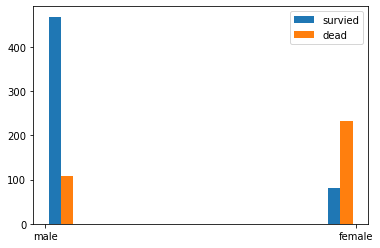

In [6]:
plt.hist([df[df.Survived==0]['Sex'],df[df.Survived==1]['Sex']],label=['survied','dead'])
plt.legend()

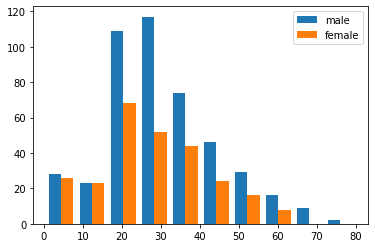

In [17]:
plt.hist([df[df.Sex=='male']['Age'],df[df.Sex=='female']['Age']],label=['male','female'])
plt.legend()

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.shape

(891, 12)

In [14]:
df.drop(['Name','Cabin','Ticket'],axis='columns',inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [16]:
int(df.Age.mean())

29

In [19]:
df.Age = df.Age.fillna(int(df.Age.mean()))

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [30]:
df = df.dropna()

In [22]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 29.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

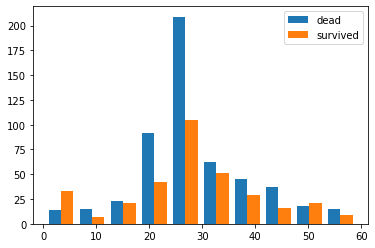

In [81]:
plt.hist([df[df.Survived==0]['Age'],df[df.Survived==1]['Age']],label=['dead','survived'])
plt.legend()

In [26]:
df.Age.quantile(0.97)

59.0

In [36]:
df = df[~(df.Age>59)]

In [38]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [39]:
df.groupby('Parch')['Parch'].count()

Parch
0    656
1    114
2     80
3      5
4      3
5      5
6      1
Name: Parch, dtype: int64

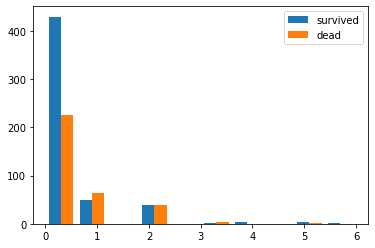

In [40]:
plt.hist([df[df.Survived==0]['Parch'],df[df.Survived==1]['Parch']],label=['survived','dead'])
plt.legend()

In [43]:
df[df.Parch>2]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
13,14,0,3,male,39.0,1,5,31.2750,S
25,26,1,3,female,38.0,1,5,31.3875,S
86,87,0,3,male,16.0,1,3,34.3750,S
167,168,0,3,female,45.0,1,4,27.9000,S
360,361,0,3,male,40.0,1,4,27.9000,S
437,438,1,2,female,24.0,2,3,18.7500,S
567,568,0,3,female,29.0,0,4,21.0750,S
610,611,0,3,female,39.0,1,5,31.2750,S
638,639,0,3,female,41.0,0,5,39.6875,S
678,679,0,3,female,43.0,1,6,46.9000,S


In [47]:
Parch0 = df.Parch.apply(lambda x: 1 if x==0 else 0)
Parch1 = df.Parch.apply(lambda x: 1 if x==1 else 0)
Parch2 = df.Parch.apply(lambda x: 1 if x==2 else 0)

In [55]:
df2 = pd.concat([df,Parch0,Parch1,Parch2],axis=1)
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Parch_0,Parch_1,Parch_2
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,0


In [54]:
Parch0 = Parch0.rename('Parch_0')
Parch1 = Parch1.rename('Parch_1')
Parch2 = Parch2.rename('Parch_2')

In [56]:
df2.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

(array([[382.,  94.,  15.,  12.,   0.,  15.,   5.,   0.,   0.,   7.],
        [205., 109.,  13.,   4.,   0.,   3.,   0.,   0.,   0.,   0.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 2 BarContainer objects>)

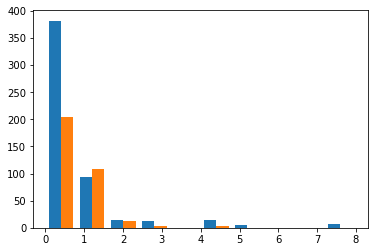

In [58]:
plt.hist([df2[df2.Survived==0]['SibSp'],df2[df2.Survived==1]['SibSp']],label=['survived','dead'])

In [61]:
df2.SibSp.quantile(0.95)

3.0

In [62]:
SibSp_0 = df2.Parch.apply(lambda x: 1 if x==0 else 0)
SibSp_1 = df2.Parch.apply(lambda x: 1 if x==1 else 0)

In [63]:
SibSp_0 = SibSp_0.rename('SibSp_0') 
SibSp_1 = SibSp_1.rename('SibSp_1')

In [64]:
df3 = pd.concat([df2,SibSp_1,SibSp_0],axis=1)
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Parch_0,Parch_1,Parch_2,SibSp_1,SibSp_0
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,0,0,1


In [66]:
df3.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Parch_0,Parch_1,Parch_2,SibSp_1,SibSp_0
886,887,0,2,male,27.0,0,0,13.00,S,1,0,0,0,1
887,888,1,1,female,19.0,0,0,30.00,S,1,0,0,0,1
888,889,0,3,female,29.0,1,2,23.45,S,0,0,1,0,0
889,890,1,1,male,26.0,0,0,30.00,C,1,0,0,0,1
890,891,0,3,male,32.0,0,0,7.75,Q,1,0,0,0,1


In [67]:
df3.drop(['Parch','SibSp'],axis=1,inplace=True)

In [69]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Parch_0,Parch_1,Parch_2,SibSp_1,SibSp_0
0,1,0,3,male,22.0,7.2500,S,1,0,0,0,1
1,2,1,1,female,38.0,71.2833,C,1,0,0,0,1
2,3,1,3,female,26.0,7.9250,S,1,0,0,0,1
3,4,1,1,female,35.0,53.1000,S,1,0,0,0,1
4,5,0,3,male,35.0,8.0500,S,1,0,0,0,1


In [70]:
df3.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [71]:
df3.drop(['PassengerId'],axis=1,inplace=True)

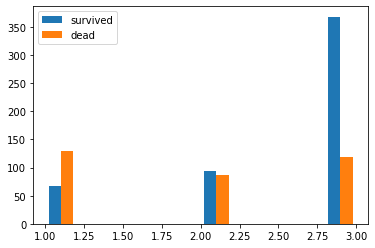

In [74]:
plt.hist([df2[df2.Survived==0]['Pclass'],df2[df2.Survived==1]['Pclass']],label=['survived','dead'])
plt.legend()

In [75]:
Pclass_1 = df3.Pclass.apply(lambda x: 1 if x==1 else 0)
Pclass_3 = df3.Pclass.apply(lambda x: 1 if x==3 else 0)

In [76]:
Pclass_1 = Pclass_1.rename('Pclass_1')
Pclass_3 = Pclass_3.rename('Pclass_3')

In [77]:
df4 = pd.concat([df3,Pclass_1,Pclass_3],axis=1)
df4.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Parch_0,Parch_1,Parch_2,SibSp_1,SibSp_0,Pclass_1,Pclass_3
0,0,3,male,22.0,7.2500,S,1,0,0,0,1,0,1
1,1,1,female,38.0,71.2833,C,1,0,0,0,1,1,0
2,1,3,female,26.0,7.9250,S,1,0,0,0,1,0,1
3,1,1,female,35.0,53.1000,S,1,0,0,0,1,1,0
4,0,3,male,35.0,8.0500,S,1,0,0,0,1,0,1


In [78]:
df4.drop(['Pclass'],inplace=True,axis=1)

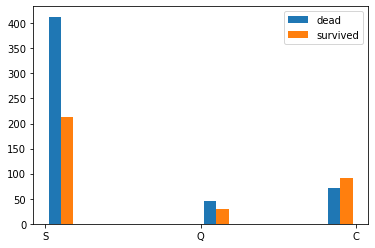

In [80]:
plt.hist([df2[df2.Survived==0]['Embarked'],df2[df2.Survived==1]['Embarked']],label=['dead','survived'])
plt.legend()

In [82]:
df4.drop(['Embarked'],inplace=True,axis=1)
df4.head()

,Survived,Sex,Age,Fare,Parch_0,Parch_1,Parch_2,SibSp_1,SibSp_0,Pclass_1,Pclass_3
0,0,male,22.0,7.2500,1,0,0,0,1,0,1
1,1,female,38.0,71.2833,1,0,0,0,1,1,0
2,1,female,26.0,7.9250,1,0,0,0,1,0,1
3,1,female,35.0,53.1000,1,0,0,0,1,1,0
4,0,male,35.0,8.0500,1,0,0,0,1,0,1


(array([[483.,  34.,   8.,   0.,   4.,   1.,   0.,   0.,   0.,   0.],
        [230.,  65.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.]]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 2 BarContainer objects>)

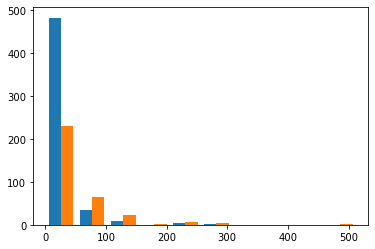

In [83]:
plt.hist([df2[df2.Survived==0]['Fare'],df2[df2.Survived==1]['Fare']],label=['dead','survived'])

In [84]:
df4.drop(['Fare'],inplace=True,axis=1)

In [86]:
df4.Sex = df4.Sex.apply(lambda x: 0 if x=='female' else 1)

In [87]:
df4.head()

,Survived,Sex,Age,Parch_0,Parch_1,Parch_2,SibSp_1,SibSp_0,Pclass_1,Pclass_3
0,0,1,22.0,1,0,0,0,1,0,1
1,1,0,38.0,1,0,0,0,1,1,0
2,1,0,26.0,1,0,0,0,1,0,1
3,1,0,35.0,1,0,0,0,1,1,0
4,0,1,35.0,1,0,0,0,1,0,1


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4.drop(['Survived'],axis=1), df4.Survived, test_size=0.25, stratify=df4.Survived)

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [92]:
clf.score(X_test,y_test)

0.7916666666666666

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8240740740740741

In [97]:
from sklearn import svm
clf2 = svm.SVC()
clf2.fit(X_train, y_train)
clf2.score(X_test,y_test)

0.6064814814814815

In [99]:
X_train.columns

Index(['Sex', 'Age', 'Parch_0', 'Parch_1', 'Parch_2', 'SibSp_1', 'SibSp_0',
       'Pclass_1', 'Pclass_3'],
      dtype='object')

In [155]:
df_test2 = pd.read_csv('test.csv')
df_test2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [145]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [103]:
df_test.drop(['Name'],axis=1,inplace=True)

In [135]:
import numpy as np

In [149]:
def convertor(df_test1):
    SibSp_0 = df_test1.Parch.apply(lambda x: 1 if x==0 else 0)
    SibSp_1 = df_test1.Parch.apply(lambda x: 1 if x==1 else 0)
    Pclass_1 = df_test1.Pclass.apply(lambda x: 1 if x==1 else 0)
    Pclass_3 = df_test1.Pclass.apply(lambda x: 1 if x==3 else 0)
    Parch0 = df_test1.Parch.apply(lambda x: 1 if x==0 else 0)
    Parch1 = df_test1.Parch.apply(lambda x: 1 if x==1 else 0)
    Parch2 = df_test1.Parch.apply(lambda x: 1 if x==2 else 0)
    Sex = df_test1.Sex.apply(lambda x: 0 if x=='female' else 1)
#     print(len(SibSp_0),len(p))
    X = pd.DataFrame({'Sex':Sex, 'Age':df_test1.Age, 'Parch_0':Parch0, 'Parch_1':Parch1, 'Parch_2':Parch2, 'SibSp_1':SibSp_1, 'SibSp_0':SibSp_0,'Pclass_1':Pclass_1, 'Pclass_3':Pclass_3})
    return X

In [151]:
df_test_conv = convertor(df_test)
df_test_conv.head()

,Sex,Age,Parch_0,Parch_1,Parch_2,SibSp_1,SibSp_0,Pclass_1,Pclass_3
0,1,34.5,1,0,0,0,1,0,1
1,0,47.0,1,0,0,0,1,0,1
2,1,62.0,1,0,0,0,1,0,0
3,1,27.0,1,0,0,0,1,0,1
4,0,22.0,0,1,0,1,0,0,1


In [110]:
X_train.head()

,Sex,Age,Parch_0,Parch_1,Parch_2,SibSp_1,SibSp_0,Pclass_1,Pclass_3
610,0,39.0,0,0,0,0,0,0,1
484,1,25.0,1,0,0,0,1,1,0
860,1,41.0,1,0,0,0,1,0,1
853,0,16.0,0,1,0,1,0,1,0
642,0,2.0,0,0,1,0,0,0,1


In [119]:
df_test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64

In [118]:
df_test.fillna(29,inplace=True)

In [152]:
df_test_conv.isnull().sum()

Sex         0
Age         0
Parch_0     0
Parch_1     0
Parch_2     0
SibSp_1     0
SibSp_0     0
Pclass_1    0
Pclass_3    0
dtype: int64

In [153]:
prediction_logistic = model.predict(df_test_conv)
prediction_logistic

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [154]:
prediction_forest = clf.predict(df_test_conv)
prediction_forest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [156]:
import csv
from itertools import zip_longest
with open('D:\ml projects\prediction_titanic_logistic.csv','w',newline='',encoding='utf-8') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(['PassengerId',"Survived"])
    information = [df_test2.PassengerId,prediction_logistic]
    iter_tool = zip_longest(*information)
    wr.writerows(iter_tool)
with open('D:\ml projects\prediction_titanic_randomforest.csv','w',newline='',encoding='utf-8') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(['PassengerId',"Survived"])
    information = [df_test2.PassengerId,prediction_forest]
    iter_tool = zip_longest(*information)
    wr.writerows(iter_tool)